In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [218]:
σ,v,ɛ = np.sqrt(0.04),1.5,0
θ = σ,v,ɛ

In [219]:
t = np.linspace(0,1,1001)
u = 1j

In [220]:
M = rp.mgf(1,t,θ)

In [256]:
plt.rcParams['figure.figsize'] = [3*1.618,3]
# plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['legend.loc'] = 'center left'

In [257]:
u = 1
ϑ = np.sqrt(1 - 2*(σ*v)**2*u)
c = (1 - ϑ)/v**2

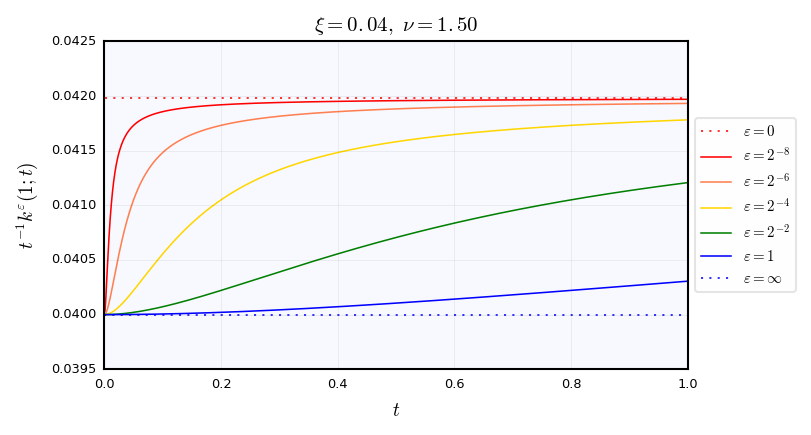

In [267]:
plot,axes = plt.subplots()

θ = σ,v,0
M = rp.mgf(1,t,θ)
axes.plot(t,np.log(M)/t,'r:')

for ɛ in 2.**(-np.arange(8,-2,-2)):
    θ = σ,v,ɛ
    M = rp.mgf(1,t,θ)
    axes.plot(t,np.log(M)/t)

axes.plot(t,σ**2*np.ones_like(t),'b:')

axes.set_title(r'$\xi=%.2f,\ \nu=%.2f$'%(σ**2,v))
axes.set_xlabel(r'$t$')
axes.set_ylabel(r'$t^{-1}k^\varepsilon(1;t)$')
axes.set_ylim([0.0395,0.0425])
axes.legend([r'$\varepsilon = 0$',
             r'$\varepsilon = 2^{-8}$',
             r'$\varepsilon = 2^{-6}$',
             r'$\varepsilon = 2^{-4}$',
             r'$\varepsilon = 2^{-2}$',
             r'$\varepsilon = 1$',
             r'$\varepsilon = \infty$'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fname = r'cgf-converge'
plt.savefig(fname)

In [205]:
u = 1
ϑ = np.sqrt(1 - 2*(σ*v)**2*u)
c = (1 - ϑ)/v**2

0.041982882749448169

In [339]:
BSV = rp.surface(T,k,C)

In [340]:
pd.DataFrame(BSV,index=M,columns=k[0,:])

,-1.20397280433,-1.1711829815,-1.13943428319,-1.10866262452,-1.07880966137,-1.0498221245,-1.02165124753,-0.994252273344,-0.967584026262,-0.941608539858,...,0.131028262406,0.139761942375,0.148420005118,0.15700374881,0.165514438478,0.173953307123,0.182321556794,0.190620359609,0.198850858745,0.207014169384
1W,2.174050e+00,2.443324,2.159248e+00,2.066210e+00,1.000000e-09,1.000000e-09,1.885366,1.692514e+00,1.797210e+00,1.614883,...,0.195595,0.199050,0.211494,1.000000e-09,0.234300,1.000000e-09,1.000000e-09,0.265199,1.000000e-09,1.000000e-09
2W,1.665548e+00,1.690423,1.540126e+00,1.403504e+00,1.000000e-09,1.000000e-09,1.133417,1.000000e-09,1.000000e-09,1.199031,...,0.180662,0.186183,0.191488,1.965888e-01,0.201496,2.062287e-01,2.107102e-01,0.215101,2.196772e-01,2.244000e-01
1M,1.000000e-09,0.986234,1.000000e-09,1.000000e-09,8.649882e-01,1.000000e-09,0.749177,7.398932e-01,7.452779e-01,0.765822,...,0.152660,0.157686,0.162532,1.672132e-01,0.171737,1.761202e-01,1.803635e-01,0.184485,1.884832e-01,1.923708e-01
3M,6.563684e-01,0.646292,6.365527e-01,6.269352e-01,6.174669e-01,6.081470e-01,0.598988,5.899622e-01,5.810727e-01,0.572299,...,0.109160,0.112290,0.115353,1.183473e-01,0.121275,1.241380e-01,1.269374e-01,0.129676,1.323558e-01,1.349787e-01
6M,5.122720e-01,0.504530,4.969449e-01,4.895093e-01,4.822133e-01,4.750488e-01,0.468008,4.610832e-01,4.542686e-01,0.447558,...,0.091949,0.093721,0.095507,9.729487e-02,0.099078,1.008494e-01,1.026056e-01,0.104343,1.060609e-01,1.077561e-01
1Y,3.927385e-01,0.387200,3.817795e-01,3.764682e-01,3.712600e-01,3.661485e-01,0.361128,3.561940e-01,3.513410e-01,0.346565,...,0.087317,0.087496,0.087809,8.823361e-02,0.088747,8.933312e-02,8.997719e-02,0.090668,9.139572e-02,9.215294e-02


In [341]:
plt.rcParams['figure.figsize'] = [2*1.618*2,2*3]
plt.rcParams['legend.loc'] = 'upper right'

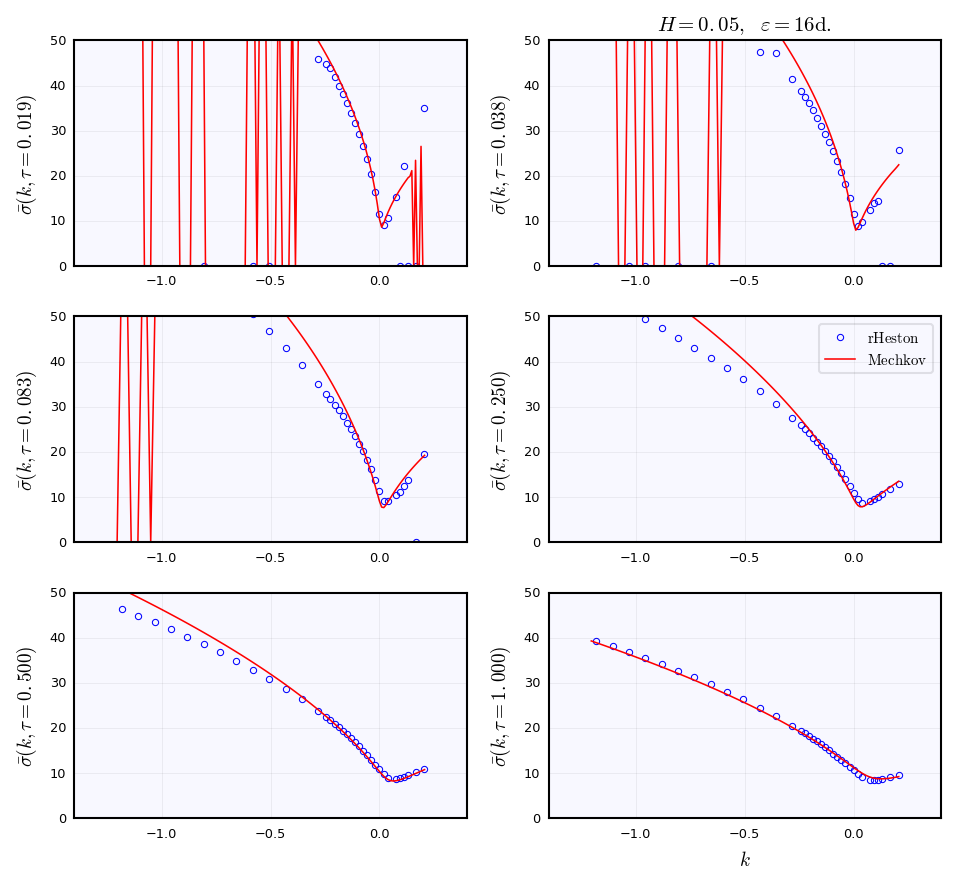

In [342]:
plot,axes = plt.subplots(3,2)
n = -1
for i in range(3):
    for j in range(2):
        n += 1
        axes[i,j].plot(np.log(K),100*np.array(RHS.iloc[:,n+1]),'bo')
        axes[i,j].plot(k[n,:],100*BSV[n,:])
        axes[i,j].set_ylabel(r'$\bar{\sigma}(k,\tau=%.3f)$'%T[n,0])
        axes[i,j].set_ylim([0,50])
axes[0,1].set_title(r'$\varepsilon=\mathrm{%s}.$'%TS)
axes[0,1].set_title(r'$H = 0.05,\ \ \varepsilon=\mathrm{%s}.$'%TS)
axes[1,1].legend([r'$\mathrm{rHeston}$',r'$\mathrm{Mechkov}$'])
axes[2,1].set_xlabel(r'$k$')
plt.tight_layout()
fname = r'rHeston-v-Mechkov-%s'%TS
plt.savefig(fname)